In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data1=pd.read_csv(r"C:\Users\AISHWARYA\Downloads\Oct-2021.csv", encoding='latin-1')
data1.T.head()

,0,1,2,3,4,5,6,7,8,9,...,59,60,61,62,63,64,65,66,67,68
KARNATAKA STATE ROAD TRANSPORT CORPORATION,DIVISIONWISE OPERATIONAL RESULTS FOR THE MONTH...,NaN,NaN,Sl.No.,NaN,1,NaN,2,NaN,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 1,NaN,NaN,NaN,Factor,Physical performance,Schedules,(As on last day),Fleet Held,(As on last day),Fleet Utilisation (%),...,MDY,CJR,HSN,CKM,MNG,PTR,DVG,SMG,CDG,KBS
Unnamed: 2,NaN,NaN,NaN,BNG©,NaN,570,NaN,739,NaN,67.3,...,Mandya,Chamarajanagar,Hassan,Chikkamagaluru,Mangaluru,Puttur,Davanagere,Shivamoga,Chitradurga,Kempegowda Bus Station is a Division with just...
Unnamed: 3,NaN,NaN,NaN,RMN,NaN,462,NaN,503,NaN,85.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 4,NaN,NaN,NaN,TMK,NaN,575,NaN,619,NaN,85.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
D1=data1.T
D1.columns=D1.iloc[1]
D1=D1[2:]
D1
col_to_keep=['Schedules','Fleet Held (As on last day)','Fleet Utilisation (%)','% off road  vehicles','Schedule kms (in lakh)', 'Effective Kilometers (in lakh)']
D1.drop(columns=[col for col in D1.columns if col not in col_to_keep],inplace=True)
#remove empty rows
D1.dropna(inplace=True)
D1
#adding a new column as city id
D1['City_Id'] = range(1, len(D1) + 1)
D1.columns

Index(['Schedules', 'Fleet Utilisation (%)', '% off road  vehicles',
       'Schedule kms (in lakh)', 'Effective Kilometers (in lakh)', 'City_Id'],
      dtype='object', name='Unnamed: 1')

In [4]:
print(D1.columns)

Index(['Schedules', 'Fleet Utilisation (%)', '% off road  vehicles',
       'Schedule kms (in lakh)', 'Effective Kilometers (in lakh)', 'City_Id'],
      dtype='object', name='Unnamed: 1')


In [5]:
#Effective passenger density
#effPassDensity=(('Fleet Utilisation(%)')*0.01)*('Fleet Held')
D1['Fleet Utilisation (%)'] = pd.to_numeric(D1['Fleet Utilisation (%)'], errors='coerce')
D1['Schedules'] = pd.to_numeric(D1['Schedules'], errors='coerce')


FleetUtilisation=D1['Fleet Utilisation (%)']*0.01
FleetHeldArray=D1['Schedules']
EffPassDensity=np.multiply(FleetUtilisation, FleetHeldArray)
D1['EffPassDensity']=EffPassDensity

In [6]:
D1.info

<bound method DataFrame.info of Unnamed: 1   Schedules  Fleet Utilisation (%) % off road  vehicles  \
Unnamed: 2         570                   67.3                    5   
Unnamed: 3         462                   85.2                  4.5   
Unnamed: 4         575                   85.6                  4.9   
Unnamed: 5         500                   83.4                  2.9   
Unnamed: 6         518                   88.7                  2.4   
Unnamed: 7         372                   78.1                  4.2   
Unnamed: 8         603                   84.2                  3.9   
Unnamed: 9         403                   81.6                  6.9   
Unnamed: 10        443                   85.3                  5.9   
Unnamed: 11        499                   89.6                  6.5   
Unnamed: 12        482                   93.5                  3.1   
Unnamed: 13        452                   72.9                  7.1   
Unnamed: 14        485                   83.6             

In [7]:
D1.head()

Unnamed: 1,Schedules,Fleet Utilisation (%),% off road vehicles,Schedule kms (in lakh),Effective Kilometers (in lakh),City_Id,EffPassDensity
Unnamed: 2,570,67.3,5,60.88,65.73,1,383.610
Unnamed: 3,462,85.2,4.5,41.9,43.1,2,393.624
Unnamed: 4,575,85.6,4.9,59.28,57.31,3,492.200
Unnamed: 5,500,83.4,2.9,45.77,48.69,4,417.000
Unnamed: 6,518,88.7,2.4,49.58,53.73,5,459.466


In [8]:
D1.tail()

Unnamed: 1,Schedules,Fleet Utilisation (%),% off road vehicles,Schedule kms (in lakh),Effective Kilometers (in lakh),City_Id,EffPassDensity
Unnamed: 14,485,83.6,4.9,44.77,45.29,13,405.460
Unnamed: 15,332,93.8,4.3,34.25,34.84,14,311.416
Unnamed: 16,302,79.8,4.4,31.44,33.49,15,240.996
Unnamed: 17,257,86.5,6.8,27.99,28.8,16,222.305
Unnamed: 19,7255,83.1,4.8,710.03,738.64,17,6028.905


In [9]:
D1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17 entries, Unnamed: 2 to Unnamed: 19
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Schedules                       17 non-null     int64  
 1   Fleet Utilisation (%)           17 non-null     float64
 2   % off road  vehicles            17 non-null     object 
 3   Schedule kms (in lakh)          17 non-null     object 
 4   Effective Kilometers (in lakh)  17 non-null     object 
 5   City_Id                         17 non-null     int64  
 6   EffPassDensity                  17 non-null     float64
dtypes: float64(2), int64(2), object(3)
memory usage: 1.1+ KB


In [10]:
D1

Unnamed: 1,Schedules,Fleet Utilisation (%),% off road vehicles,Schedule kms (in lakh),Effective Kilometers (in lakh),City_Id,EffPassDensity
Unnamed: 2,570,67.3,5,60.88,65.73,1,383.610
Unnamed: 3,462,85.2,4.5,41.9,43.1,2,393.624
Unnamed: 4,575,85.6,4.9,59.28,57.31,3,492.200
Unnamed: 5,500,83.4,2.9,45.77,48.69,4,417.000
Unnamed: 6,518,88.7,2.4,49.58,53.73,5,459.466
Unnamed: 7,372,78.1,4.2,19.25,19.88,6,290.532
Unnamed: 8,603,84.2,3.9,63.1,67.17,7,507.726
Unnamed: 9,403,81.6,6.9,37.91,38.94,8,328.848
Unnamed: 10,443,85.3,5.9,44.85,46.39,9,377.879
Unnamed: 11,499,89.6,6.5,49.95,51.36,10,447.104


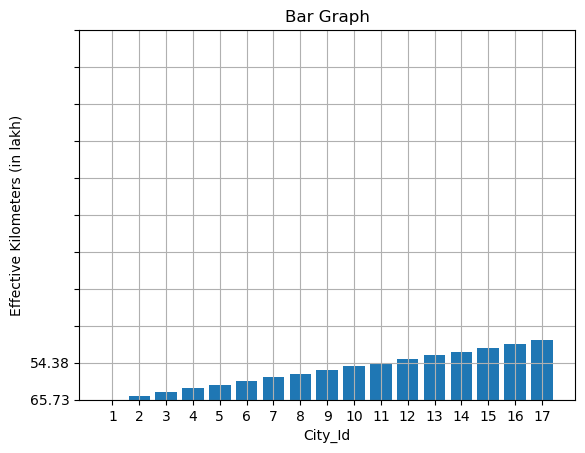

In [11]:
X=D1['City_Id']
Y=D1['Effective Kilometers (in lakh)']
plt.bar(X,Y)
plt.title("Bar Graph")
plt.xlabel('City_Id')
plt.ylabel('Effective Kilometers (in lakh)')
plt.xticks(X)  # Set x-axis ticks to match city IDs
# Set y-axis range with a step of 10
plt.ylim(0, 100)  # Set the y-axis range from 0 to 100
plt.yticks(range(0, 101, 10))  # Set y-axis ticks with a step of 10
plt.grid(True)
plt.show()

In [12]:
import scipy
print(scipy.__version__)

1.10.1


In [13]:
X=D1['City_Id']
Y=D1['EffPassDensity']
'''
plt.bar(X,Y)
plt.xlabel('City ID')
plt.ylabel('EffPassDensity')% of road vehicles
plt.xticks(X)  # Set x-axis ticks to match city IDs
# Set y-axis range with a step of 10
plt.ylim(0, 1000)  # Set the y-axis range from 0 to 100
plt.yticks(range(0, 1001, 50))  # Set y-axis ticks with a step of 10
plt.grid(True)
plt.show()
'''

"\nplt.bar(X,Y)\nplt.xlabel('City ID')\nplt.ylabel('EffPassDensity')% of road vehicles\nplt.xticks(X)  # Set x-axis ticks to match city IDs\n# Set y-axis range with a step of 10\nplt.ylim(0, 1000)  # Set the y-axis range from 0 to 100\nplt.yticks(range(0, 1001, 50))  # Set y-axis ticks with a step of 10\nplt.grid(True)\nplt.show()\n"

In [14]:
D1

Unnamed: 1,Schedules,Fleet Utilisation (%),% off road vehicles,Schedule kms (in lakh),Effective Kilometers (in lakh),City_Id,EffPassDensity
Unnamed: 2,570,67.3,5,60.88,65.73,1,383.610
Unnamed: 3,462,85.2,4.5,41.9,43.1,2,393.624
Unnamed: 4,575,85.6,4.9,59.28,57.31,3,492.200
Unnamed: 5,500,83.4,2.9,45.77,48.69,4,417.000
Unnamed: 6,518,88.7,2.4,49.58,53.73,5,459.466
Unnamed: 7,372,78.1,4.2,19.25,19.88,6,290.532
Unnamed: 8,603,84.2,3.9,63.1,67.17,7,507.726
Unnamed: 9,403,81.6,6.9,37.91,38.94,8,328.848
Unnamed: 10,443,85.3,5.9,44.85,46.39,9,377.879
Unnamed: 11,499,89.6,6.5,49.95,51.36,10,447.104


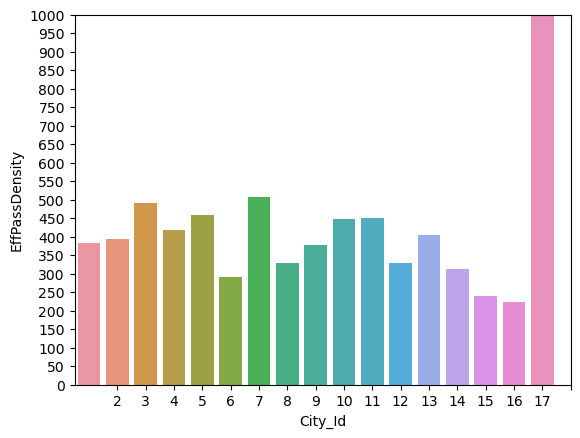

In [15]:
sns.barplot(x=X,y=Y,orient='v')
plt.xticks(X)
plt.ylim(0, 1000)  # Set the y-axis range from 0 to 100
plt.yticks(range(0, 1001, 50))
plt.show()

In [16]:
meanEPD=np.mean(D1['EffPassDensity'])
print('Mean of EffPassDensity:',meanEPD)

D1['EffPassDensity'].values

Mean of EffPassDensity: 711.0146470588235


array([ 383.61 ,  393.624,  492.2  ,  417.   ,  459.466,  290.532,
        507.726,  328.848,  377.879,  447.104,  450.67 ,  329.508,
        405.46 ,  311.416,  240.996,  222.305, 6028.905])

In [17]:
std_by_city = D1['EffPassDensity'].std()
variance=std_by_city**2
print('variance:',variance)
print('Standard deviation:',std_by_city)

variance: 1884776.5692082425
Standard deviation: 1372.8716506681324


In [18]:
#calculate the (X-mean) for each city and it as a column
XdiffMean=D1['EffPassDensity'][:15].values-meanEPD


NewD1={
    'City Id':D1['City_Id'][:15].values,
    'Schedules':D1['EffPassDensity'][:15].values,
    'Mean Variations':XdiffMean
}
NewD1=pd.DataFrame(NewD1)
NewD1

,City Id,Schedules,Mean Variations
0,1,383.610,-327.404647
1,2,393.624,-317.390647
2,3,492.200,-218.814647
3,4,417.000,-294.014647
4,5,459.466,-251.548647
5,6,290.532,-420.482647
6,7,507.726,-203.288647
7,8,328.848,-382.166647
8,9,377.879,-333.135647
9,10,447.104,-263.910647


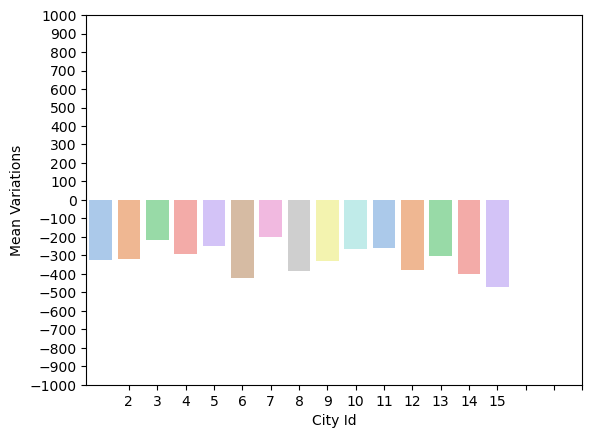

In [19]:
sns.barplot(x=NewD1['City Id'],y=NewD1['Mean Variations'],palette='pastel')
plt.xticks(X)
plt.ylim(0, 1000)  # Set the y-axis range from 0 to 100
plt.yticks(range(-1000, 1001, 100))
plt.show()

C:\Users\AISHWARYA\AppData\Local\Temp\ipykernel_18408\1783733234.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(pdf_values, shade = True)


<Axes: title={'center': 'Kernel Density Estimate Plot'}, ylabel='Density'>

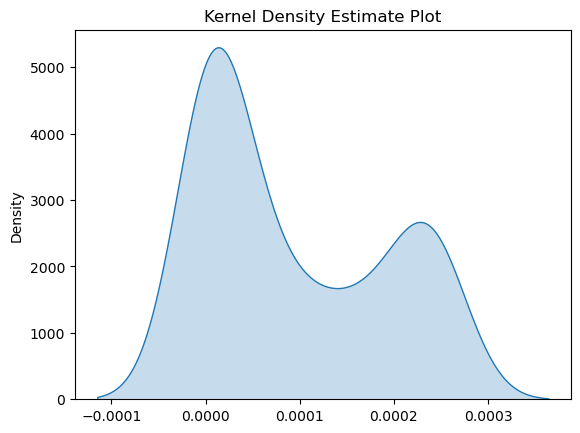

In [20]:
import statistics as stats
from scipy.stats import norm 
dfmean = np.mean(D1['Schedules'])
sd = np.std(D1['Schedules'])
sorted_data = D1['Schedules'].sort_values()
X=np.linspace(D1['Schedules'].min(),D1['Schedules'].max(),100)
plt.title('Kernel Density Estimate Plot')
pdf_values = norm.pdf(X, dfmean, sd)
sns.kdeplot(pdf_values, shade = True)

In [21]:
Stats = D1.describe(include='all')
cols = Stats.index.tolist()
Stats

Unnamed: 1,Schedules,Fleet Utilisation (%),% off road vehicles,Schedule kms (in lakh),Effective Kilometers (in lakh),City_Id,EffPassDensity
count,17.000000,17.000000,17,17,17,17.000000,17.000000
unique,NaN,NaN,16,17,17,NaN,NaN
top,NaN,NaN,4.9,60.88,65.73,NaN,NaN
freq,NaN,NaN,2,1,1,NaN,NaN
mean,853.529412,83.658824,NaN,NaN,NaN,9.000000,711.014647
std,1652.395765,6.667932,NaN,NaN,NaN,5.049752,1372.871651
min,257.000000,67.300000,NaN,NaN,NaN,1.000000,222.305000
25%,403.000000,81.600000,NaN,NaN,NaN,5.000000,328.848000
50%,482.000000,84.200000,NaN,NaN,NaN,9.000000,393.624000
75%,518.000000,86.500000,NaN,NaN,NaN,13.000000,450.670000


In [22]:
for col in D1.columns:
    D1[col] = pd.to_numeric(D1[col], errors='coerce')


In [23]:
for j in cols:
    for i in Stats.columns:
        if j == 'mean' and pd.isna(Stats.loc[j, i]):
            Stats.loc[j, i] = D1[i].mean()
        elif j == 'std' and pd.isna(Stats.loc[j, i]):
            Stats.loc[j, i] = D1[i].std()
        elif j == 'min' and pd.isna(Stats.loc[j, i]):
            Stats.loc[j, i] = D1[i].min()
        elif j == 'max' and pd.isna(Stats.loc[j, i]):
            Stats.loc[j, i] = D1[i].max()
        elif j == '25%' and pd.isna(Stats.loc[j, i]):
            Stats.loc[j, i] = D1[i].quantile(q=0.25)
        elif j == '50%' and pd.isna(Stats.loc[j, i]):
            Stats.loc[j, i] = D1[i].quantile(q=0.50)
        elif j == '75%' and pd.isna(Stats.loc[j, i]):
            Stats.loc[j, i] = D1[i].quantile(q=0.75)

# Display the updated Stats DataFrame
print(Stats)


Unnamed: 1    Schedules  Fleet Utilisation (%) % off road  vehicles  \
count         17.000000              17.000000                   17   
unique              NaN                    NaN                   16   
top                 NaN                    NaN                  4.9   
freq                NaN                    NaN                    2   
mean         853.529412              83.658824             4.852941   
std         1652.395765               6.667932             1.408509   
min          257.000000              67.300000                  2.4   
25%          403.000000              81.600000                  4.2   
50%          482.000000              84.200000                  4.8   
75%          518.000000              86.500000                  5.9   
max         7255.000000              93.800000                  7.1   

Unnamed: 1 Schedule kms (in lakh) Effective Kilometers (in lakh)    City_Id  \
count                          17                             17  17

<class 'numpy.int64'>


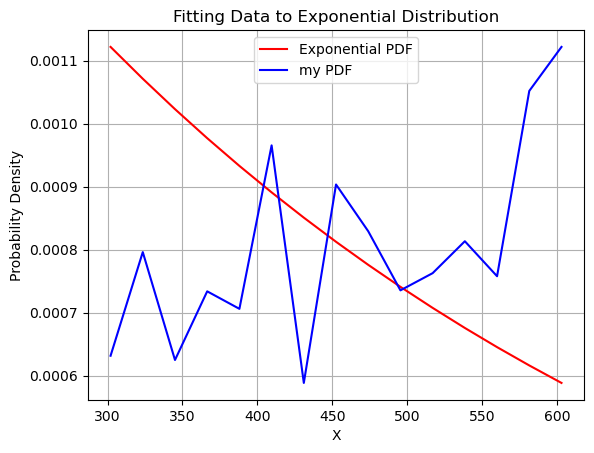

[0.00112198 0.00107145 0.00102319 0.00097711 0.0009331  0.00089108
 0.00085094 0.00081262 0.00077602 0.00074107 0.00070769 0.00067582
 0.00064538 0.00061631 0.00058855] [0.00063169 0.00079624 0.00062496 0.00073395 0.00070618 0.00096566
 0.00058855 0.00090358 0.00082933 0.00073553 0.00076283 0.00081349
 0.00075794 0.00105211 0.00112198]


In [24]:
from scipy.stats import expon

# Given data
data = D1['Schedules'][0:15].to_numpy()
# Calculate lambda for the exponential distribution
lambda_param = 1 / data.mean()
print(type(data[0]))
myData=data.astype('float64')


# Generate x values for the plot
x_range = np.linspace(min(data), max(data), 15)
Data=-lambda_param*x_range
myData=-lambda_param*myData
# Calculate the exponential PDF values
pdf_values = np.exp(Data)
myPdf=np.exp(myData)

pdf_values=lambda_param*pdf_values
myPdf=lambda_param*myPdf

# Plot the exponential PDF curve
plt.plot(x_range, pdf_values, color='red', label='Exponential PDF')
plt.plot(x_range, myPdf, color='blue', label='my PDF')
plt.xlabel('X')
plt.ylabel('Probability Density')
plt.title('Fitting Data to Exponential Distribution')
plt.legend()
plt.grid(True)
plt.show()

print(pdf_values,myPdf)

In [25]:
#Left with:
'''
Correlation Analysis
Scatter Plot
Scatter heat map'''


'\nCorrelation Analysis\nScatter Plot\nScatter heat map'

In [26]:
D1.columns

Index(['Schedules', 'Fleet Utilisation (%)', '% off road  vehicles',
       'Schedule kms (in lakh)', 'Effective Kilometers (in lakh)', 'City_Id',
       'EffPassDensity'],
      dtype='object', name='Unnamed: 1')

In [27]:
D1['EffPassDensity'].values

array([ 383.61 ,  393.624,  492.2  ,  417.   ,  459.466,  290.532,
        507.726,  328.848,  377.879,  447.104,  450.67 ,  329.508,
        405.46 ,  311.416,  240.996,  222.305, 6028.905])

In [28]:
Xfactor=D1['EffPassDensity'][:15].values
Yfactor=D1['Effective Kilometers (in lakh)'][:15].values
print(Xfactor.size,Yfactor.size)
R=scipy.stats.pearsonr(Xfactor,Yfactor)
print("Coefficient of correlation between EffPassDensity & Effective Kilometers (in lakh):",R[0])

15 15
Coefficient of correlation between EffPassDensity & Effective Kilometers (in lakh): 0.7880605177600977


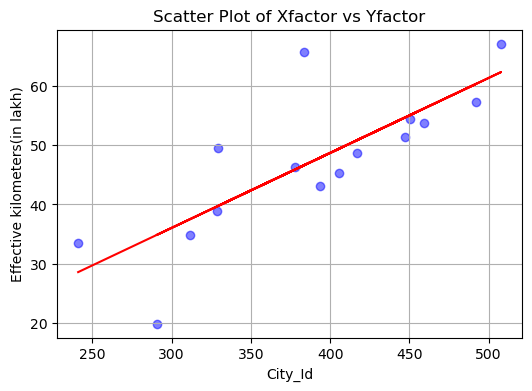

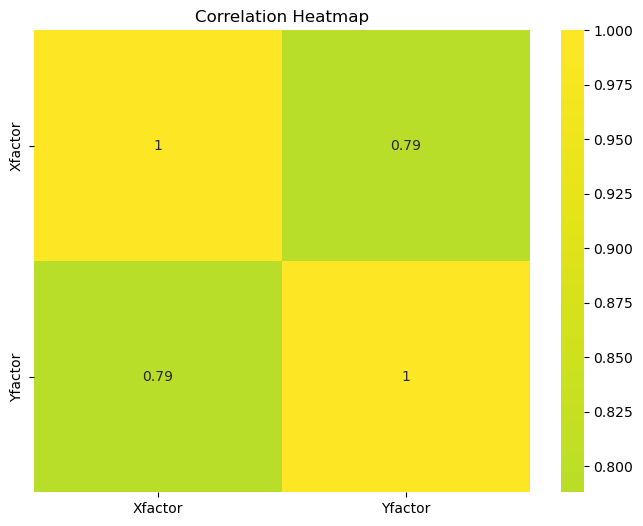

In [29]:
data = {
    'Xfactor': D1['EffPassDensity'][:15].values,
    'Yfactor': D1['Effective Kilometers (in lakh)'][:15].values
}
Df=pd.DataFrame(data)
corrMatrix=Df.corr()
corrMatrix
Df['Xfactor'] = pd.to_numeric(Df['Xfactor'])
Df['Yfactor'] = pd.to_numeric(Df['Yfactor'])

subset_df=Df[:15]
slope, intercept = np.polyfit(subset_df['Xfactor'], subset_df['Yfactor'], 1)
regression_line = slope * subset_df['Xfactor'] + intercept

plt.figure(figsize=(6, 4))
plt.scatter(Df['Xfactor'][:15], Df['Yfactor'][:15], color='blue', alpha=0.5)
plt.plot(subset_df['Xfactor'], regression_line, color='red', label='Regression Line')
plt.xlabel('City_Id')
plt.ylabel('Effective kilometers(in lakh)')
plt.title('Scatter Plot of Xfactor vs Yfactor')
plt.grid(True)

plt.show()


plt.figure(figsize=(8, 6))
sns.heatmap(corrMatrix, annot=True, cmap='viridis', center=0,linecolor='blue')
plt.title('Correlation Heatmap')
plt.show()


